In [3]:
library(ggbiplot)
library(factoextra)
library(corrplot)
library(NbClust)
library(FunCluster)
library(pca3d)
library(e1071)
library(poLCA)
library(reshape2)
library(psych)
library(DescTools)
library(paran)

Warning message:
"package 'paran' was built under R version 3.5.3"

In [5]:
s123 <- read.csv("C:\\Users\\marpr\\Desktop\\docto\\respuestas-s123 - copia.csv", sep=',')
s123 <-  scale((s123), center = TRUE)
s123 <- data.frame(s123)
s1 <- s123[,1:4]
s3 <- s123[,5:7]
s2 <- s123[,8:9]
s123

s1.High,s1.Medium.High,s1.Medium.Low,s1.Low,S3.1,S3.2,S3.3,s2.Relatively.High,s2.Relatively.Low
-0.5665622,-0.02029991,1.3499545,0.6047592,-0.87391025,0.2311756,0.84709472,-0.72445124,0.81891015
-0.5665622,1.34994395,1.0189030,0.6047592,-0.57485351,1.0634078,-0.02586549,-0.15523955,0.23143113
0.7674941,-0.47704786,-1.1329319,-0.8531424,1.96712878,-1.6413468,-1.18981243,1.19016990,-1.15715564
1.0639511,-1.39054376,-1.2984576,1.0907264,1.21948693,-1.4332888,0.26512125,0.20698607,-0.46286226
-0.5665622,2.94856178,-0.4708288,-0.8531424,0.17278834,-0.3929985,-0.31685222,0.87969079,-0.83671254
-0.5665622,0.20807407,0.6878515,0.6047592,-0.12626840,0.6472917,-0.02586549,0.51746517,-0.56967662
-0.5665622,-0.02029991,0.6878515,-0.8531424,0.02325997,-0.1849405,0.26512125,-0.51746517,0.28483831
-0.7147906,0.66482202,-0.1397773,0.6047592,-0.57485351,0.6472917,-0.02586549,0.00000000,-0.19582634
-0.2701052,0.89319599,-0.1397773,0.1187920,-0.42532514,1.2714658,0.26512125,0.56921169,-0.56967662
-0.4183337,0.43644804,1.0189030,0.6047592,-0.72438188,0.4392337,0.84709472,-1.03493034,0.87231733



Using eigendecomposition of correlation matrix.
Computing: 20%  40%  60%  80%  100%


Results of Horn's Parallel Analysis for factor retention
45 iterations, using the mean estimate

-------------------------------------------------- 
Factor      Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
No components passed. 
-------------------------------------------------- 
1           1.517127    1.955528      0.438400
2           0.632521    0.780600      0.148079
3          -0.027579   -0.08421     -0.05663
4           0.081901   -0.15886     -0.24076
-------------------------------------------------- 

Adjusted eigenvalues > 0 indicate dimensions to retain.
(2 factors    retained)



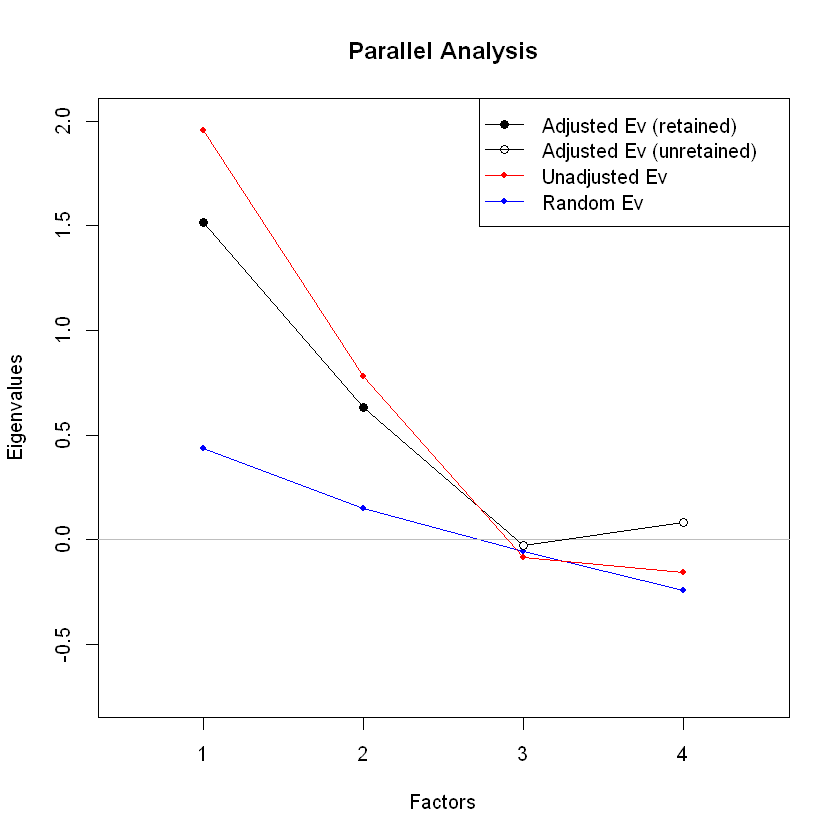

In [10]:
# png('S1_parallel.png', width = 5,
#   height    = 5,
#   units     = "in",
#   res       = 1000,
#   pointsize = 8)

paran(s1, iterations = 45, centile = 0, quietly = FALSE, 
    status = TRUE, all = TRUE, cfa = TRUE, graph = TRUE, color = TRUE, 
    col = c("black", "red", "blue"), lty = c(1, 2, 3), lwd = 1, legend = TRUE, 
    file = "", width = 2000, height = 2000, grdevice = "png", seed = 0)

# dev.off()


Using eigendecomposition of correlation matrix.
Computing: 20%  40%  60%  80%  100%


Results of Horn's Parallel Analysis for factor retention
45 iterations, using the mean estimate

-------------------------------------------------- 
Factor      Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
No components passed. 
-------------------------------------------------- 
1           1.808606    1.960219      0.151613
2           0.089755   -0.01314     -0.10289
-------------------------------------------------- 

Adjusted eigenvalues > 0 indicate dimensions to retain.
(2 factors    retained)



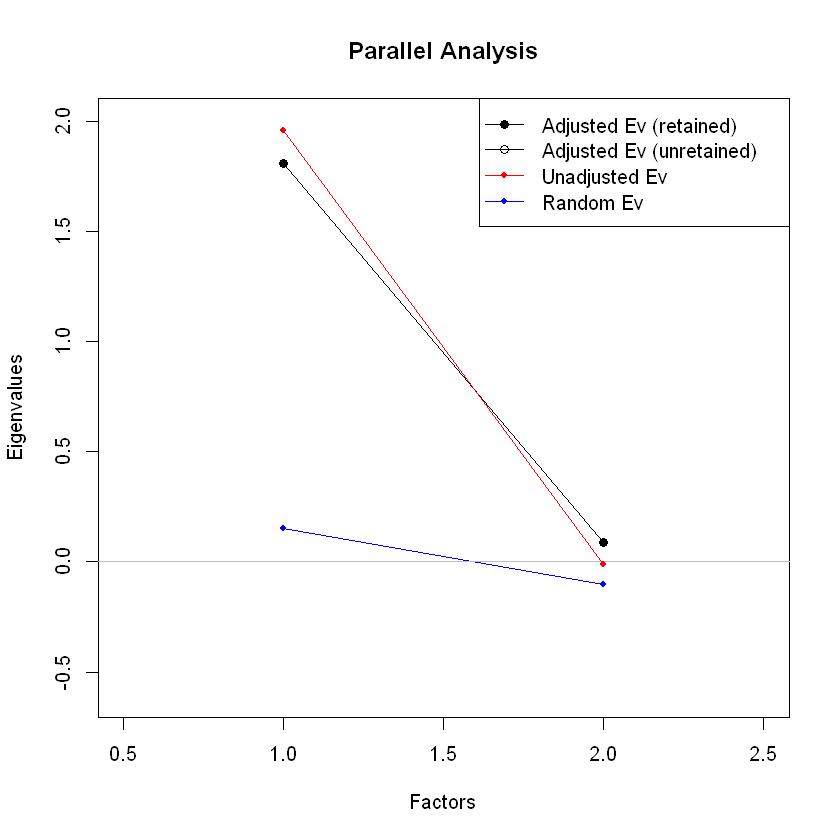

In [7]:
# png('S2_parallel.png', width = 5,
#   height    = 5,
#   units     = "in",
#   res       = 1000,
#   pointsize = 8)

paran(s2, iterations = 45, centile = 0, quietly = FALSE, 
    status = TRUE, all = TRUE, cfa = TRUE, graph = TRUE, color = TRUE, 
    col = c("black", "red", "blue"), lty = c(1, 2, 3), lwd = 1, legend = TRUE, 
    file = "", width = 2000, height = 2000, grdevice = "png", seed = 0)

# dev.off()


Using eigendecomposition of correlation matrix.
Computing: 20%  40%  60%  80%  100%


Results of Horn's Parallel Analysis for factor retention
45 iterations, using the mean estimate

-------------------------------------------------- 
Factor      Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
No components passed. 
-------------------------------------------------- 
1           1.796978    2.088797      0.291818
2           0.512631    0.533651      0.021019
3           0.097190   -0.08067     -0.17786
-------------------------------------------------- 

Adjusted eigenvalues > 0 indicate dimensions to retain.
(3 factors    retained)



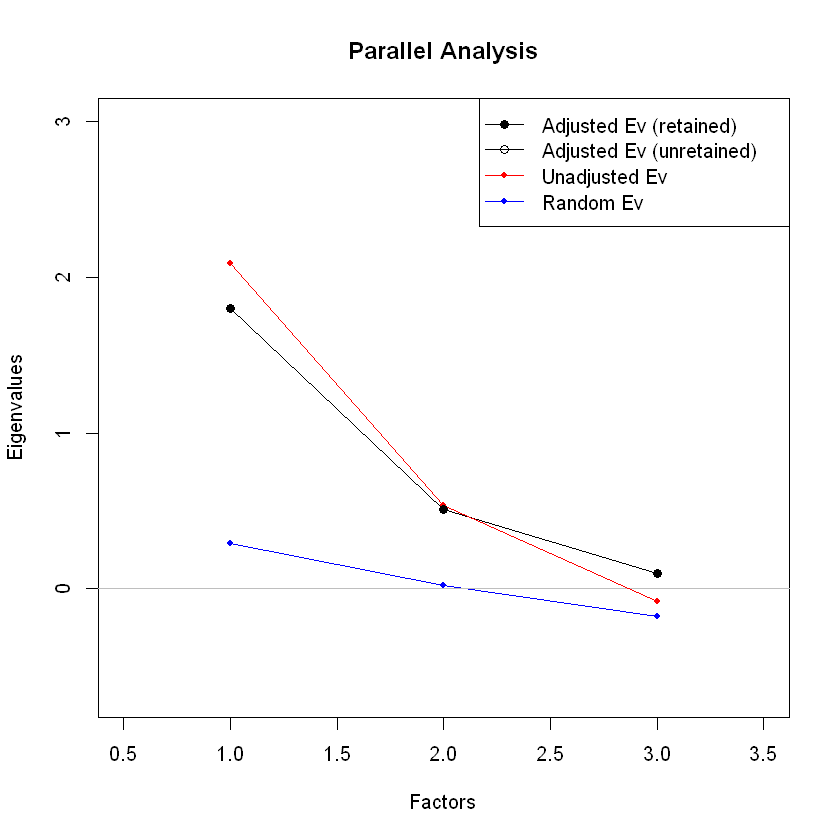

In [8]:
# png('S3_parallel.png', width = 5,
#   height    = 5,
#   units     = "in",
#   res       = 1000,
#   pointsize = 8)

paran(s3, iterations = 45, centile = 0, quietly = FALSE, 
    status = TRUE, all = TRUE, cfa = TRUE, graph = TRUE, color = TRUE, 
    col = c("black", "red", "blue"), lty = c(1, 2, 3), lwd = 1, legend = TRUE, 
    file = "", width = 2000, height = 2000, grdevice = "png", seed = 0)

# dev.off()